<a href="https://colab.research.google.com/github/sunnatillo91/ai-datascience/blob/main/05_ML_15_Iyerarxik_algoritm_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

## Clustering

### Amaliyot: Ierarxik (hierarchical) algoritm

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import pandas as pd
import numpy as np
%matplotlib inline
import pylab

### Dataset
Ushbu darsda avtomobillarni klasterlaymiz.

#### Dataset

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv"
df = pd.read_csv(url)
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


#### Ma'lumotlarni tozalash

In [3]:
df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)
df.head(5)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


Klasterlash uchun ustunlarni tanlab olamiz.

In [4]:
featureset = df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

##**Normalizasiya**

In [5]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

## Klasterlash

Ierarxik klasterlash uchun `Scipy` paketidan foydalanmiz.

Boshlanishiga distance matrix `D` (masofalar matrisasini) quramiz:

In [6]:
import scipy
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

Modelni o'qitamiz (training)

In [7]:
Z = hierarchy.linkage(D)

<ipython-input-7-36d73b9e0e0b>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D)


### Dendogram

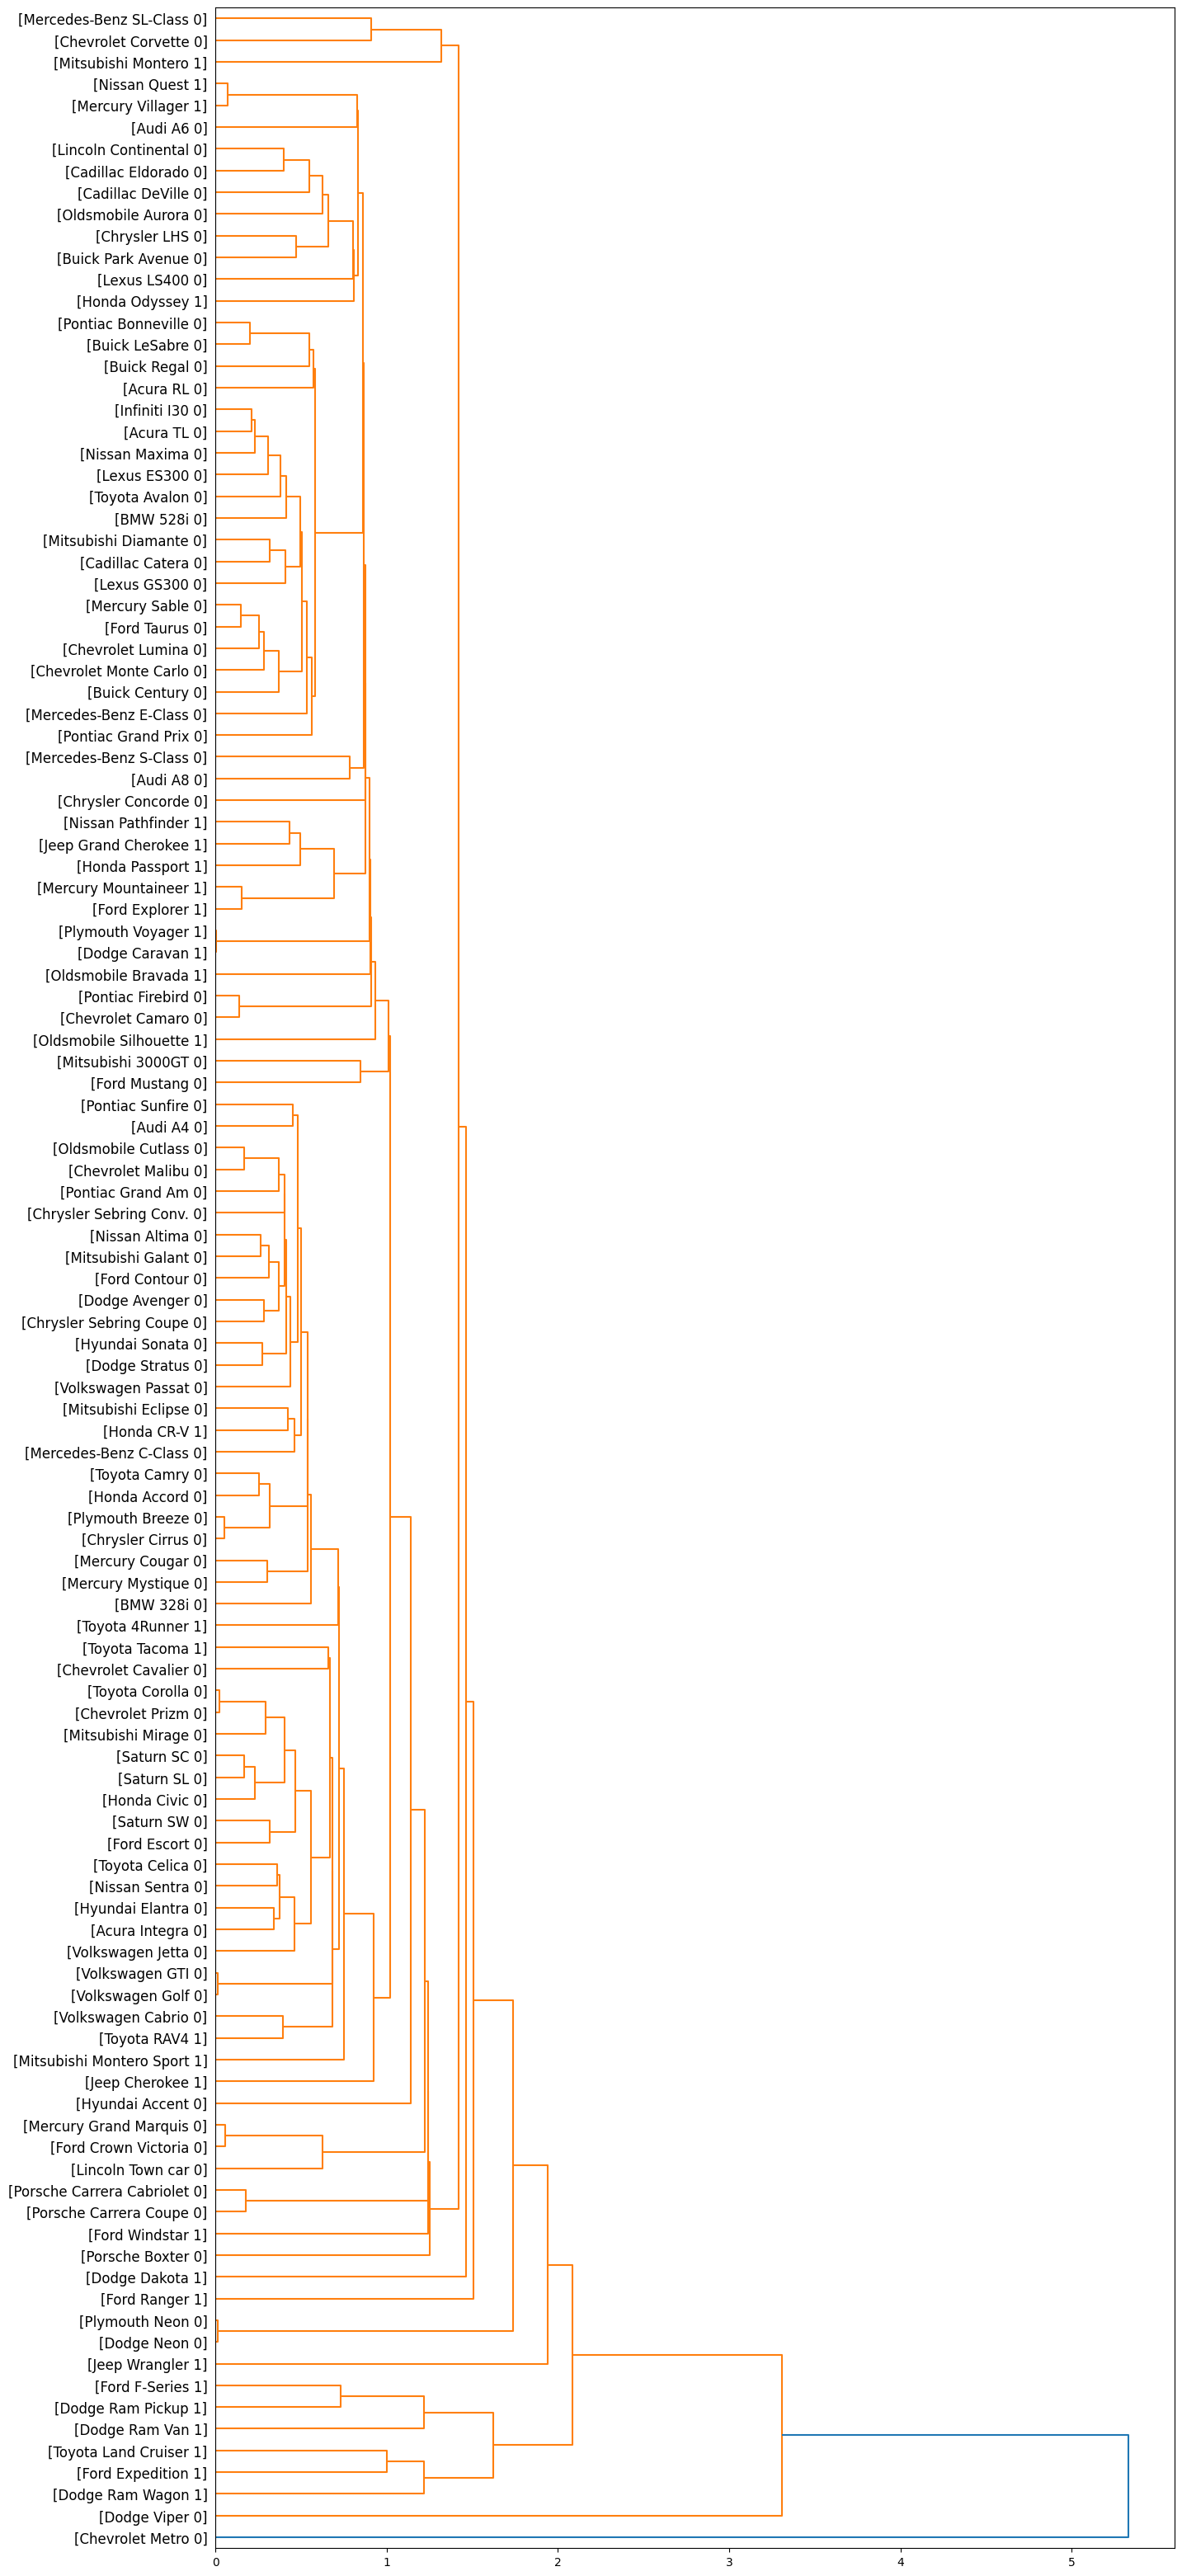

In [10]:
fig = pylab.figure(figsize=(15,40))
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )

dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Klasterlar sonini o'zimiz belgilab, dendogramni qayerdan kesishni ko'rsatishimiz mumkin.

In [11]:
from scipy.cluster.hierarchy import fcluster
k = 5 # 5 ta klaster
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2], dtype=int32)

## `scikit` yordamida klasterlash

In [12]:
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering

In [14]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(D)

agglom.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 2, 2, 3, 2, 4, 3, 2, 2, 2, 2, 2, 4, 4, 2, 1, 3, 2, 2, 2, 4, 1,
       5, 3, 3, 2, 3, 2, 1, 3, 3, 0, 0, 0, 0, 4, 2, 1, 3, 3, 2, 4, 2, 4,
       0, 3, 0, 1, 3, 3, 2, 4, 1, 1, 3, 2, 1, 3, 2, 2, 2, 4, 4, 4, 1, 3,
       3, 2, 3, 4, 3, 3, 3, 2, 4, 2, 2, 3, 2, 4, 4, 1, 3, 2, 2, 2, 3, 4,
       2, 4, 1, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1,
       3, 0, 1, 1, 3, 1, 1])

### Klasterlar haqida nima deya olamiz?

In [16]:
df['cluster'] = agglom.labels_
agg_cars = df.groupby(['cluster', 'type'])[['horsepow', 'engine_s', 'mpg', 'price']].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster type                                            
0       0.0   450.000000  8.000000  16.000000  69.725000
        1.0   211.666667  4.483333  16.166667  29.024667
1       0.0   118.500000  1.890000  29.550000  14.226100
        1.0   129.666667  2.300000  22.333333  14.292000
2       0.0   203.615385  3.284615  24.223077  27.988692
        1.0   182.000000  3.420000  20.300000  26.120600
3       0.0   168.107143  2.557143  25.107143  24.693786
        1.0   155.600000  2.840000  22.000000  19.807000
4       0.0   267.666667  4.566667  21.416667  46.417417
        1.0   173.000000  3.180000  20.600000  24.308400
5       0.0    55.000000  1.000000  45.000000   9.235000

Har bir klasterdagi avtomobillar haqida qanday xulosa qilish mumkin?

Masalan, ot kuchiga (`horsepow`) va motor o'lchamiga (`engine_size`)  qaraydigan bo'lsak 0-klaster katta quvvatli (450+) shuningdek kuchli motorli (8.0) narxi ham eng qimmat (69.72), 1-klaster  kichikroq quvvatli (129+) shuningdek kuchsizroq motorli (2.3) narxi ham arzon (14.29), 5-klaster esa eng kichik quvvatli (55+) shuningdek eng kuchsiz motorli (1.0) narxi ham eng arzon (9.23) ekanligini ko'ramiz.

Har bir klasterni yaqqol ajratib turuvchi ustunlar bu `horsepow` (ot kuchi) va `engine_size` (motor o'lchami) ekan.

Demak biz har klasterni quyidagicha ta'riflashimiz mumkin:
- 0-klaster - katta quvvatli, kuchli motorli, ko'p yoqilg'i sarflaydigan narxi ham eng qimmat avtomobillar.
- 1-klaster - o'rta quvvatli, o'rta motorli, o'rtacha yoqilg'i sarflaydigan narxi ham arzonroq avtomobillar.
- 5-klaster - kichik quvvatli, kuchsiz motorli, kam yoqilg'i sarflaydigan narxi ham eng arzo avtomobillar.